In [1]:
import numpy as np
import pandas as pd

%pylab inline
%matplotlib inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv("ab_browser_test.csv")
exp_data = data[data.slot == 'exp']
control_data = data[data.slot == 'control']
data.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [168]:
control_clicks = control_data.n_clicks.sum()
exp_clicks = exp_data.n_clicks.sum()
print(control_clicks, exp_clicks)
100* (exp_clicks - control_clicks) / control_clicks

3210027 3261823


1.6135689824415806

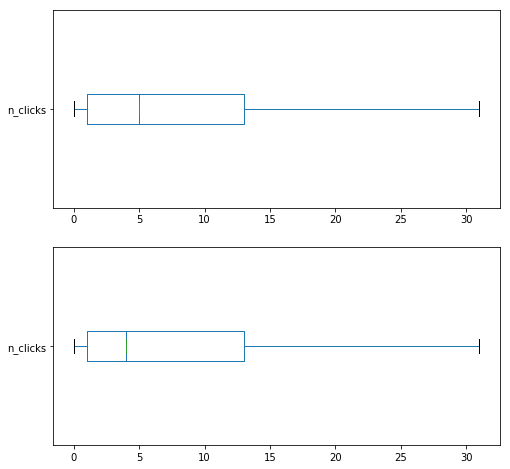

In [4]:
pylab.figure(figsize=(8,8))
pylab.subplot(2,1,1)
exp_data.n_clicks.plot.box(notch=True, bootstrap=100, vert=False, showfliers=False)
pylab.subplot(2,1,2)
control_data.n_clicks.plot.box(notch=True, bootstrap=100, vert=False, showfliers=False)
pylab.show()

In [5]:
def get_bootstrap_samples(data, n_samples=1000):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    return data[indices]

def stat_intervals(stat, alpha=0.05):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [6]:
# get values first
exp_clicks_values     = exp_data.n_clicks.values
control_clicks_values = control_data.n_clicks.values

n = 1000
x = get_bootstrap_samples(exp_clicks_values, n)
y = get_bootstrap_samples(control_clicks_values, n)

a = map(np.median, x)
b = map(np.median, y)
c = map(lambda x: x[0] - x[1], zip(a, b))
print(stat_intervals(list(c)))

a = map(np.mean, x)
b = map(np.mean, y)
c = map(lambda x: x[0] - x[1], zip(a, b))
print(stat_intervals(list(c)))

[1. 1.]
[0.18913521 0.41061689]


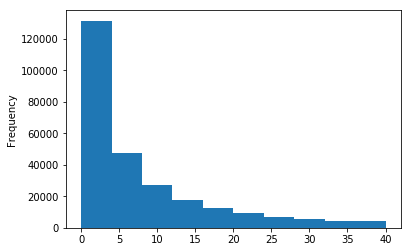

In [7]:
control_data.n_clicks.plot.hist(range=(0,40))

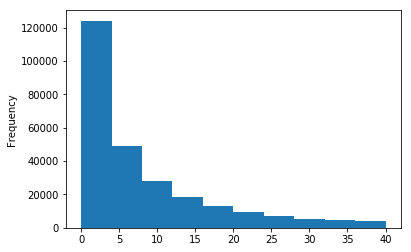

In [8]:
exp_data.n_clicks.plot.hist(range=(0,40))

In [9]:
np.random.seed(0)
n_boot_samples = 500
#посчитайте среднее и сумму квадратов отклонения от выборочного среднего 
a = list(get_bootstrap_samples(control_clicks_values, n_boot_samples))
b = list(map(np.mean, a))
c = list(map(lambda x: np.sum((x[0]-x[1])**2) , zip(a, b)))

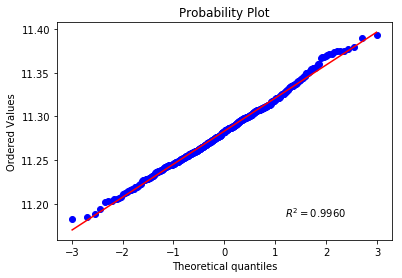

In [10]:
import scipy.stats as ss

ss.probplot(b, dist="norm", plot=plt, rvalue=True)
plt.show()

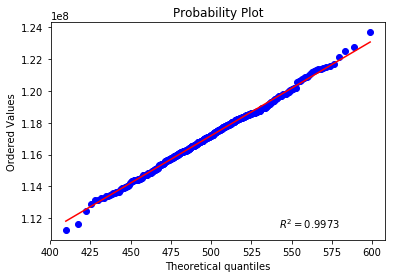

In [11]:
ss.probplot(c, dist="chi2", sparams=(n_boot_samples-1), plot=plt, rvalue=True)
plt.show()

In [61]:
pivot1 = exp_data.pivot_table(index="userID", values="n_clicks", aggfunc=np.sum)
pivot2 = control_data.pivot_table(index="userID", values="n_clicks", aggfunc=np.sum)

In [65]:
print(pivot1.n_clicks.mean(), pivot2.n_clicks.mean())

11.589351572215314 11.287332273762974


In [66]:
from scipy.stats import mannwhitneyu

mannwhitneyu(pivot1.n_clicks, pivot2.n_clicks)

MannwhitneyuResult(statistic=38901259929.0, pvalue=4.3471471887604393e-75)

In [159]:
pivot1 = exp_data.pivot_table(index=["browser", "userID"], values="n_clicks", aggfunc=np.sum)
pivot2 = control_data.pivot_table(index=["browser", "userID"], values="n_clicks", aggfunc=np.sum)

In [160]:
pvals = []
for browser in pivot1.index.get_level_values('browser').unique():
    print(browser)
    pvals.append(mannwhitneyu(pivot1.loc[browser].n_clicks, pivot2.loc[browser].n_clicks).pvalue)

Browser #14
Browser #17
Browser #2
Browser #20
Browser #22
Browser #4


In [161]:
pvals

[0.0,
 0.03740060143010802,
 0.0272438604197241,
 0.45366656388735377,
 0.2574055152210032,
 0.40760617658454984]

In [162]:
from statsmodels.stats.multitest import multipletests

multipletests(pvals, alpha=0.05, method="holm")

(array([ True, False, False, False, False, False]),
 array([0.        , 0.14960241, 0.1362193 , 0.81521235, 0.77221655,
        0.81521235]),
 0.008512444610847103,
 0.008333333333333333)

In [163]:
pivot1 = exp_data.pivot_table(index=["browser"], values=["n_nonclk_queries", "n_queries"], aggfunc=np.sum)
pivot2 = control_data.pivot_table(index=["browser"], values=["n_nonclk_queries", "n_queries"], aggfunc=np.sum)

In [166]:
data = pivot1.reset_index()
data = data.n_nonclk_queries / data.n_queries
#print(data)

data2 = pivot2.reset_index()
data2 = data2.n_nonclk_queries / data2.n_queries
#print(data2)
print(data-data2)

0   -0.138348
1    0.006380
2   -0.009800
3   -0.015631
4   -0.007400
5   -0.018280
dtype: float64
